#                            IMDB MOVIE REVIEWS SENTIMENT ANALYSIS

### By Dhakshesh T

# Import Packages and Data

In [45]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [46]:
df = pd.read_csv(r"C:\Users\Dhakshesh\Documents\Spyder\data\IMDB Dataset.csv")
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


# Data Summary and Sentiment Encoding

In [47]:
#obtaining the basic outlook of the dataset
print("Dataset Summary : \n", df.describe())

print("**********************************************************************")

print("\nNumber of reviews: ",len(df))

print("**********************************************************************")

print("\nTotal number of Sentiments: ", len(list(set(df['sentiment']))))

#encoding positive sentiments with 1 and negative ones with 0
df['sentiment'] = np.where(df['sentiment'] == "positive", 1, 0)
df

Dataset Summary : 
                                                    review sentiment
count                                               50000     50000
unique                                              49582         2
top     Loved today's show!!! It was a variety and not...  positive
freq                                                    5     25000
**********************************************************************

Number of reviews:  50000
**********************************************************************

Total number of Sentiments:  2


,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1
...,...,...
49995,I thought this movie did a down right good job...,1
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",0
49997,I am a Catholic taught in parochial elementary...,0
49998,I'm going to have to disagree with the previou...,0


# Data Visualization

Text(0, 0.5, 'Count')

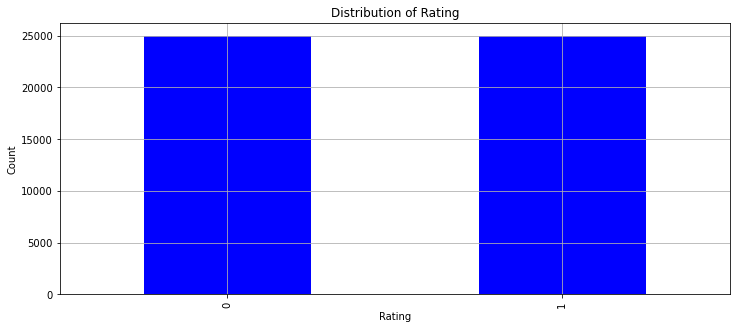

In [48]:
#Using a count plot to understand sentiment distribution
plt.figure(figsize=(12,5))
df['sentiment'].value_counts().sort_index().plot(kind='bar',color = 'blue')
plt.title('Distribution of Rating')
plt.grid()
plt.xlabel('Rating')
plt.ylabel('Count')

From the plot above it is evident that the Distribution of the reating between the obsereved sentiment is equal.

# Data Preparation

In [49]:
df = df.sample(frac=0.1, random_state=0) #uncomment to use full set of data

# Drop missing values
df.dropna(inplace=True)

df

,review,sentiment
11841,John Cassavetes is on the run from the law. He...,1
19602,It's not just that the movie is lame. It's mor...,0
45519,"Well, if it weren't for Ethel Waters and a 7-y...",0
25747,I find Alan Jacobs review very accurate concer...,1
42642,This movie is simply awesome. It is so hilario...,1
...,...,...
9869,This is an excellent movie that tackles the is...,1
42192,i was kinda interested in this movie as a tras...,0
12143,I think I am some kind of Road Runner fan. I d...,1
34963,Two years passed and mostly everyone looks dif...,1


In [50]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df['review'], df['sentiment'], \
                                                    test_size=0.1, random_state=0)

print('Load %d training examples and %d validation examples. \n' %(X_train.shape[0],X_test.shape[0]))
print('Show a review in the training set : \n', X_train.iloc[10])
X_train,y_train

Load 4500 training examples and 500 validation examples. 

Show a review in the training set : 
 THE CRIMSON RIVERS is one of the most over-directed, over-the-top, over-everything mess I've ever seen come out of France. There's nothing worse than a French production trying to out-do films made in Hollywood and CR is a perfect example of such a wannabe horror/action/buddy flick. I almost stopped it halfway through because I knew it wouldn't amount to anything but French guys trying to show-off.<br /><br />The film starts off promisingly, like some sort of expansive horror film, but it quickly shifts genres, from horror to action to x-files type to buddy flick, that in the end, CR is all of it and also none of it. It's so full of clichés that at one point I thought the whole thing was a comedy. The painful dialogue and those silent pauses, with fades outs and fades ins just at the right expositionary moments, made me groan. I thought only films made in Hollywood used this hackneyed techn

(23499    Paul Naschy as a ghostly security guard in thi...
 32754    For every series that makes it to television, ...
 41199    I had the displeasure of watching this movie w...
 4152     Hear are some of the interesting things our co...
 36723    Every time I think about this film I feel phys...
                                ...                        
 33530    I can not believe such slanted, jingoistic mat...
 16729    This movie was rented by a friend. Her choice ...
 33642    A British teen movies which centres around a g...
 10195    I only gave this film a 4 because I saw it in ...
 7520     What a disappointment!<br /><br />This film se...
 Name: review, Length: 4500, dtype: object,
 23499    1
 32754    0
 41199    0
 4152     0
 36723    0
         ..
 33530    0
 16729    0
 33642    0
 10195    0
 7520     0
 Name: sentiment, Length: 4500, dtype: int32)

# Text Processing

In [52]:
#using BeautifulSoup(for HTML tags) , SnowballStemmer (root word conversion) and eliminating StopWords 
import re
import nltk
from nltk.corpus import stopwords 
from nltk.stem.porter import PorterStemmer
from nltk.stem import SnowballStemmer, WordNetLemmatizer
from nltk import sent_tokenize, word_tokenize, pos_tag
from bs4 import BeautifulSoup

#custom function to enable data cleaning and return a pure dataset.
def cleanText(raw_text, remove_stopwords=False, stemming=False, split_text=False):
    '''
    Convert a raw review to a cleaned review
    '''
    text = BeautifulSoup(raw_text, 'html.parser').get_text()
    letters_only = re.sub("[^a-zA-Z]", " ", text)
    words = letters_only.lower().split() 
    
    if remove_stopwords:
        stops = set(stopwords.words("english"))
        words = [w for w in words if not w in stops]
        
    if stemming==True:

        stemmer = SnowballStemmer('english') 
        words = [stemmer.stem(w) for w in words]
        
    if split_text==True:
        return (words)
    
    return( " ".join(words))

In [53]:
import logging
from wordcloud import WordCloud
from gensim.models import word2vec
from gensim.models import Word2Vec
from gensim.models.keyedvectors import KeyedVectors

X_train_cleaned = []
X_test_cleaned = []

for d in X_train:
    X_train_cleaned.append(cleanText(d))
print('Show a cleaned review in the training set : \n',  X_train_cleaned[10])
    
for d in X_test:
    X_test_cleaned.append(cleanText(d))

Show a cleaned review in the training set : 
 the crimson rivers is one of the most over directed over the top over everything mess i ve ever seen come out of france there s nothing worse than a french production trying to out do films made in hollywood and cr is a perfect example of such a wannabe horror action buddy flick i almost stopped it halfway through because i knew it wouldn t amount to anything but french guys trying to show off the film starts off promisingly like some sort of expansive horror film but it quickly shifts genres from horror to action to x files type to buddy flick that in the end cr is all of it and also none of it it s so full of clich s that at one point i thought the whole thing was a comedy the painful dialogue and those silent pauses with fades outs and fades ins just at the right expositionary moments made me groan i thought only films made in hollywood used this hackneyed technique the chase scene with vincent cassel running after the killer is so over 

# TfidfVectorizer with Logistic Regression

In [58]:
#import the necesary packages

from sklearn.linear_model import LogisticRegression

tfidf = TfidfVectorizer(min_df=5) #minimum document frequency of 5

X_train_tfidf = tfidf.fit_transform(X_train)

print("Number of features : %d \n" %len(tfidf.get_feature_names())) 
print("Show some feature names : \n", tfidf.get_feature_names()[900:1000])

#create LogisticRegression Object
lr = LogisticRegression()
lr.fit(X_train_tfidf, y_train)

Number of features : 10505 

Show some feature names : 
 ['baseball', 'based', 'basement', 'bases', 'bash', 'bashing', 'basic', 'basically', 'basics', 'basinger', 'basis', 'basket', 'basketball', 'bastard', 'bastards', 'bat', 'bates', 'bath', 'bathroom', 'bathtub', 'batman', 'bats', 'battered', 'battle', 'battlefield', 'battles', 'battlestar', 'battling', 'bauer', 'bava', 'bay', 'bbc', 'be', 'beach', 'beaches', 'bean', 'bear', 'bearable', 'beard', 'bearing', 'bears', 'beast', 'beat', 'beaten', 'beating', 'beatings', 'beatles', 'beats', 'beatty', 'beau', 'beautiful', 'beautifully', 'beauty', 'became', 'because', 'become', 'becomes', 'becoming', 'bed', 'bedroom', 'beds', 'been', 'beep', 'beer', 'beers', 'before', 'beforehand', 'beg', 'began', 'begging', 'begin', 'beginning', 'begins', 'begs', 'begun', 'behalf', 'behave', 'behaved', 'behaves', 'behaving', 'behavior', 'behaviour', 'behind', 'behold', 'being', 'beings', 'bela', 'beleaguered', 'belief', 'beliefs', 'believability', 'believabl

LogisticRegression()

In [59]:
import pickle
pickle.dump(tfidf,open('tfidf_imdb.pkl','wb'))

In [60]:
#feature_names variable holds the list of features (ie array mapping from feature integer indices to feature name.)
feature_names = np.array(tfidf.get_feature_names())

#sorting the features
sorted_coef_index = lr.coef_[0].argsort()

print('\nTop 10 features with smallest coefficients :\n{}\n'.format(feature_names[sorted_coef_index[:10]]))
print('Top 10 features with largest coefficients : \n{}'.format(feature_names[sorted_coef_index[:-11:-1]]))


Top 10 features with smallest coefficients :
['bad' 'worst' 'awful' 'no' 'waste' 'poor' 'terrible' 'boring' 'even'
 'minutes']

Top 10 features with largest coefficients : 
['great' 'and' 'excellent' 'best' 'it' 'wonderful' 'very' 'also' 'well'
 'love']


In [61]:
#designing a custom function to evaluate the model defined in the code

from sklearn import metrics
from sklearn.metrics import accuracy_score,roc_auc_score
from sklearn.metrics import plot_confusion_matrix

def modelEvaluation(predictions):
    '''
    Print model evaluation to predicted result 
    '''
    print ("\nAccuracy on validation set: {:.4f}".format(accuracy_score(y_test, predictions)))
    print("\nAUC score : {:.4f}".format(roc_auc_score(y_test, predictions)))
    print("\nClassification report : \n", metrics.classification_report(y_test, predictions))
    print("\nConfusion Matrix : \n", metrics.confusion_matrix(y_test, predictions))

In [62]:
predictions = lr.predict(tfidf.transform(X_test_cleaned))
modelEvaluation(predictions)


Accuracy on validation set: 0.8500

AUC score : 0.8500

Classification report : 
               precision    recall  f1-score   support

           0       0.85      0.85      0.85       249
           1       0.85      0.85      0.85       251

    accuracy                           0.85       500
   macro avg       0.85      0.85      0.85       500
weighted avg       0.85      0.85      0.85       500


Confusion Matrix : 
 [[211  38]
 [ 37 214]]


In [63]:
from sklearn.model_selection import  GridSearchCV
from sklearn import metrics
from sklearn.metrics import roc_auc_score, accuracy_score
from sklearn.pipeline import Pipeline
estimators = [("tfidf", TfidfVectorizer()), ("lr", LogisticRegression())]
model = Pipeline(estimators)


params = {"lr__C":[0.1, 1, 10], 
          "tfidf__min_df": [1, 3], 
          "tfidf__max_features": [1000, None], 
          "tfidf__ngram_range": [(1,1), (1,2)], 
          "tfidf__stop_words": [None, "english"]} 

grid = GridSearchCV(estimator=model, param_grid=params, scoring="accuracy", n_jobs=-1)
grid.fit(X_train_cleaned, y_train)
print("The best paramenter set is : \n", grid.best_params_)


# Evaluate on the validaton set
predictions = grid.predict(X_test_cleaned)
modelEvaluation(predictions)

The best paramenter set is : 
 {'lr__C': 10, 'tfidf__max_features': None, 'tfidf__min_df': 3, 'tfidf__ngram_range': (1, 2), 'tfidf__stop_words': None}

Accuracy on validation set: 0.8720

AUC score : 0.8720

Classification report : 
               precision    recall  f1-score   support

           0       0.87      0.87      0.87       249
           1       0.87      0.88      0.87       251

    accuracy                           0.87       500
   macro avg       0.87      0.87      0.87       500
weighted avg       0.87      0.87      0.87       500


Confusion Matrix : 
 [[216  33]
 [ 31 220]]


In [64]:
import joblib
joblib.dump(grid.best_estimator_, 'tfidfLR.pkl')

['tfidfLR.pkl']

# Count Vectorizer with Logistic Regression

In [54]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.naive_bayes import BernoulliNB, MultinomialNB
countVect = CountVectorizer() 
X_train_countVect = countVect.fit_transform(X_train_cleaned)
print("Number of features : %d \n" %len(countVect.get_feature_names())) #6378 
print("Show some feature names : \n", countVect.get_feature_names()[::1000])


# Train MultinomialNB classifier
mnb = MultinomialNB()
mnb.fit(X_train_countVect, y_train)

Number of features : 36751 

Show some feature names : 
 ['aa', 'ameche', 'auggie', 'betrayals', 'bright', 'cathryn', 'clownhouse', 'copying', 'dazzle', 'disarray', 'dvd', 'estimation', 'fighter', 'fusion', 'greenfinch', 'henson', 'imaginings', 'ir', 'kint', 'linklater', 'maropis', 'misik', 'nectar', 'organise', 'performing', 'pre', 'rages', 'reputedly', 'saddled', 'sexiness', 'smith', 'steal', 'swoozie', 'tinfoil', 'unattuned', 'vernacular', 'willed']


MultinomialNB()

In [55]:
pickle.dump(countVect,open('countVect_imdb.pkl','wb'))

In [56]:
predictions = mnb.predict(countVect.transform(X_test_cleaned))
modelEvaluation(predictions)


Accuracy on validation set: 0.8140

AUC score : 0.8142

Classification report : 
               precision    recall  f1-score   support

           0       0.79      0.86      0.82       249
           1       0.85      0.77      0.81       251

    accuracy                           0.81       500
   macro avg       0.82      0.81      0.81       500
weighted avg       0.82      0.81      0.81       500


Confusion Matrix : 
 [[214  35]
 [ 58 193]]


In [57]:
import pickle
pickle.dump(mnb,open('Naive_Bayes_model_imdb.pkl','wb'))